# Ecoli Data Set Notebook

This is the ipynb notebook for practical part of the course. The notebook describes the ML workflow on Ecoli dataset.

## Exploring the Dataset

This section covers techniques for extraction of data and feature selection. First of all it is necessary to download the data from: https://www.kaggle.com/kannanaikkal/ecoli-uci-dataset (the dataset can also be accessed from https://archive.ics.uci.edu/ml/machine-learning-databases/ecoli/). Another file worth looking at is https://archive.ics.uci.edu/ml/machine-learning-databases/ecoli/ecoli.names, which gives us short description of the dataset. I prefer reading it using my browser.

### Loading the Dataset
Let us inspect some of the libraries necessary for data extraction.

In [2]:
# import necessary libraries for data extraction
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd

# load and summarize the dataset
from pandas import read_csv
from pandas import set_option

Let us inspect the data using the libraries we have imported. Couple of definitions before delving into the library:
* `read_csv()` - read a comma-separated values (csv) file into DataFrame.
* `DataFrame` - data structure that simply represents a table of data with rows and columns.

In [3]:
filename = 'ecoli.csv'
# load the csv file as a data frame
dataframe = read_csv(filename)

In [4]:
dataframe

,SEQUENCE_NAME,MCG,GVH,LIP,CHG,AAC,ALM1,ALM2,SITE
0,AAT_ECOLI,0.49,0.29,0.48,0.5,0.56,0.24,0.35,cp
1,ACEA_ECOLI,0.07,0.40,0.48,0.5,0.54,0.35,0.44,cp
2,ACEK_ECOLI,0.56,0.40,0.48,0.5,0.49,0.37,0.46,cp
3,ACKA_ECOLI,0.59,0.49,0.48,0.5,0.52,0.45,0.36,cp
4,ADI_ECOLI,0.23,0.32,0.48,0.5,0.55,0.25,0.35,cp
...,...,...,...,...,...,...,...,...,...
331,TREA_ECOLI,0.74,0.56,0.48,0.5,0.47,0.68,0.30,pp
332,UGPB_ECOLI,0.71,0.57,0.48,0.5,0.48,0.35,0.32,pp
333,USHA_ECOLI,0.61,0.60,0.48,0.5,0.44,0.39,0.38,pp
334,XYLF_ECOLI,0.59,0.61,0.48,0.5,0.42,0.42,0.37,pp


### Statistical Description of Dataframe

New definitions are:
* `describe()` - generates descriptive statistics. ! Output depends on provided dataset
* `include='all'` - argument named `include` with value `all` passed to the function `describe()` 

In [5]:
dataframe.describe(include="all")

,SEQUENCE_NAME,MCG,GVH,LIP,CHG,AAC,ALM1,ALM2,SITE
count,336,336.000000,336.000000,336.000000,336.000000,336.000000,336.000000,336.000000,336
unique,336,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8
top,SLYD_ECOLI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,cp
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,143
mean,NaN,0.500060,0.500000,0.495476,0.501488,0.500030,0.500179,0.499732,NaN
std,NaN,0.194634,0.148157,0.088495,0.027277,0.122376,0.215751,0.209411,NaN
min,NaN,0.000000,0.160000,0.480000,0.500000,0.000000,0.030000,0.000000,NaN
25%,NaN,0.340000,0.400000,0.480000,0.500000,0.420000,0.330000,0.350000,NaN
50%,NaN,0.500000,0.470000,0.480000,0.500000,0.495000,0.455000,0.430000,NaN
75%,NaN,0.662500,0.570000,0.480000,0.500000,0.570000,0.710000,0.710000,NaN


What can be observed from the dataset description? First let us describe first column(SEQUENCE_NAME): 
* is a labeled information
* only unique values
* frequency of top value is 1
 * which means it is arbitrarily chosen according to documentation
* all the other statistical measures show NAN
  
Does this feature convey any useful information? No! So we can fully get rid of this column and execute describe function once more on an updated data frame.

* `del df['a']` - delete column `a` from dataframe `df`

In [6]:
del dataframe['SEQUENCE_NAME']
dataframe

,MCG,GVH,LIP,CHG,AAC,ALM1,ALM2,SITE
0,0.49,0.29,0.48,0.5,0.56,0.24,0.35,cp
1,0.07,0.40,0.48,0.5,0.54,0.35,0.44,cp
2,0.56,0.40,0.48,0.5,0.49,0.37,0.46,cp
3,0.59,0.49,0.48,0.5,0.52,0.45,0.36,cp
4,0.23,0.32,0.48,0.5,0.55,0.25,0.35,cp
...,...,...,...,...,...,...,...,...
331,0.74,0.56,0.48,0.5,0.47,0.68,0.30,pp
332,0.71,0.57,0.48,0.5,0.48,0.35,0.32,pp
333,0.61,0.60,0.48,0.5,0.44,0.39,0.38,pp
334,0.59,0.61,0.48,0.5,0.42,0.42,0.37,pp


Let us describe the table again. 

In [7]:
dataframe.describe()

,MCG,GVH,LIP,CHG,AAC,ALM1,ALM2
count,336.000000,336.000000,336.000000,336.000000,336.000000,336.000000,336.000000
mean,0.500060,0.500000,0.495476,0.501488,0.500030,0.500179,0.499732
std,0.194634,0.148157,0.088495,0.027277,0.122376,0.215751,0.209411
min,0.000000,0.160000,0.480000,0.500000,0.000000,0.030000,0.000000
25%,0.340000,0.400000,0.480000,0.500000,0.420000,0.330000,0.350000
50%,0.500000,0.470000,0.480000,0.500000,0.495000,0.455000,0.430000
75%,0.662500,0.570000,0.480000,0.500000,0.570000,0.710000,0.710000
max,0.890000,1.000000,1.000000,1.000000,0.880000,1.000000,0.990000


A little statistics overview/meaning of notions:
* count - how many values we have
* mean - average value(sum/number_of_samples)
* std - standard deviation measures how observations deviate/differ from their expected value(normally is mean)
* percentile - 25/50/75% have scored less than or equal to certain value, e.g. 
  * 25% have value ≤ 0.34 for 'MCG'
  * 50% have value ≤ 0.50 for 'MCG'
  * 75% have value ≤ 0.66 for 'MCG'
* max - maximum value for a certain column

What about the 'SITE' feature? According to the description of the dataset we have 7 predictive feature, 1 name(which we removed) and 1 class distribution - which essentially is our output.
* 7 numeric features - ```inputs``` or domain of learning funtion 
* 1 class distribution - ```output``` or range of learning function

So, in other words our dataset is basically a knowledge base for trying to predict localization sites(SITE) column.

### Plotting
Sometimes it is worth visualizing the data using a histogram or other technique. Visually it is more intiuitive for human eye to perceive the plot instead of tabular format. Here we discuss plotting. Definitions:
*  histogram - frequency distribution graph(in our case used for features)
* `hist()` - function for displaying a histogram
* `pyplot.show()` - show all the plots and go back to notebook


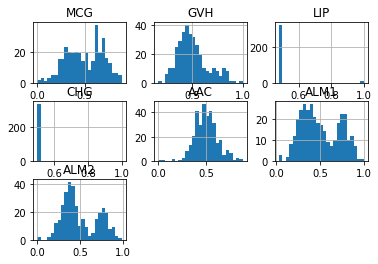

In [8]:
# create a histogram plot of each variable
dataframe.hist(bins=25)
# show the plot
plt.show()

## Picking an ML Model

Let us look into the data once more. As we can see our domain of function (in other words the inputs - X values) has 7 variables `mcg, gvh, lip, chg, aac, alm1` and `alm2` and range of function is 1 variable (output or Y values).

In [13]:
dataframe.values

array([[0.49, 0.29, 0.48, ..., 0.24, 0.35, 'cp'],
       [0.07, 0.4, 0.48, ..., 0.35, 0.44, 'cp'],
       [0.56, 0.4, 0.48, ..., 0.37, 0.46, 'cp'],
       ...,
       [0.61, 0.6, 0.48, ..., 0.39, 0.38, 'pp'],
       [0.59, 0.61, 0.48, ..., 0.42, 0.37, 'pp'],
       [0.74, 0.74, 0.48, ..., 0.53, 0.52, 'pp']], dtype=object)